# Выбор локации для скважины

<a name="1"></a>
## Содержание

1  [Содержание](#1)

2  [Описание проекта](#2)

*    2.1  [Цель проекта](#21)
*    2.2  [Задачи проекта](#22)
*    2.3  [Описание данных](#23)
*    2.4  [План работы](#24)

3  [Подготовка данных](#3)

*    3.1  [Исследование данных](#31)

   *    3.1.1  [Регион `geo_data_0`](#311)
   *    3.1.2  [Регион `geo_data_1`](#312)
   *    3.1.3  [Регион `geo_data_2`](#313)
   *    3.1.4  [Вывод по п. 3.1](#314)
    
*    3.2  [Удаление признаков](#32)
*    3.3  [Изучение распределения переменных](#33)

   *    3.3.1  [Регион `geo_data_0`](#331)
   *    3.3.2  [Регион `geo_data_1`](#332)
   *    3.3.3  [Регион `geo_data_2`](#333)
   *    3.3.4  [Вывод по п. 3.3](#334)
    
*    3.4  [Корреляционный анализ](#34)
*    3.5  [Вывод](#35)

4  [Обучение и проверка модели](#4)

*    4.1  [`LinearRegression`](#41)
*    4.2  [Вывод](#42)

5  [Подготовка к расчёту прибыли](#5)

*    5.1  [Расчёт безубыточности](#51)
*    5.2  [Вывод](#52)

6  [Расчёт прибыли и рисков](#6)

*    6.1  [Функция для расчёта прибыли](#61)
*    6.2  [Расчёт прибыли и рисков для каждого региона](#62)
*    6.3  [Вывод](#63)

7  [Общий вывод](#7)

## Описание проекта
<a name="2"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации:

- В избранном регионе собираем характеристики для скважин: качество нефти и объём её запасов;
- Построим модель для предсказания объёма запасов в новых скважинах и оценим объём запасов;
- Выберем месторождения с самым высокими оценками значений;
- Определяем регион с максимальной суммарной прибылью отобранных скважин.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

### Цель проекта
<a name="21"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Провести исследование с целью создания модели машинного обучения, которая поможет определить регион, где добыча нефти принесёт наибольшую прибыль.

Результаты исследования позволят увеличить прибыль добывающей компании «ГлавРосГосНефть».

### Задачи проекта
<a name="22"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

1. Изучить данные.
2. Подготовить данные.
3. Обучить и проверить модель.
4. Подготовить данные к расчёту прибыли.
5. Рассчитать прибыль и риски.
6. Написать общий вывод.


**Условия задачи:**

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона нужно исследовать 500 точек, из которых с помощью машинного обучения нужно выбрать 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них нужно выбрать регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

### Описание данных
<a name="23"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.

Данные геологоразведки трёх регионов находятся в файлах:
- `geo_data_0.csv`
- `geo_data_1.csv`
- `geo_data_2.csv`

**Признаки:**
- `id` — уникальный идентификатор скважины
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы)

**Целевой признак:**
- `product` — объём запасов в скважине (тыс. баррелей)

### План работы
<a name="24"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

1. Загрузим и подготовим данные. Поясним порядок действий.


2. Обучим и проверим модель для каждого региона:

   2.1. Разобьём данные на обучающую и валидационную выборки в соотношении 75:25.
   
   2.2. Обучим модель и сделаем предсказания на валидационной выборке.
   
   2.3. Сохраним предсказания и правильные ответы на валидационной выборке.
   
   2.4. Напечатаем на экране средний запас предсказанного сырья и *RMSE* модели.
   
   2.5. Проанализируем результаты.


3. Подготовимся к расчёту прибыли:

   3.1. Все ключевые значения для расчётов сохраним в отдельных переменных.
   
   3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.
   
   3.3. Напишем выводы по этапу подготовки расчёта прибыли.
   
   
4. Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

   4.1. Выберем скважины с максимальными значениями предсказаний.
   
   4.2. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
   
   4.3. Рассчитаем прибыль для полученного объёма сырья.
   
   
5. Посчитаем риски и прибыль для каждого региона:

   5.1. Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
   
   5.2. Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
   
   5.3. Напишем выводы: предложим регион для разработки скважин и обоснуем выбор.

## Подготовка данных
<a name="3"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

RANDOM_STATE = 12345
COST = 10_000_000
COUNT = 200
REVENUE_PER_UNIT = 450

SAMPLE_SIZE = 500
BOOTSTRAP_SIZE = 1000
TEST_SIZE = 0.25

### Исследование данных
<a name="31"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проведём исследование данных трёх регионов:
- `geo_data_0`;
- `geo_data_1`;
- `geo_data_2`.

#### Регион `geo_data_0`
<a name="311"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Загрузим данные и выведем размеры и первые 10 строк датасета `geo_data_0`.

In [2]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_0 = pd.read_csv('/geo_data_0.csv')

In [3]:
data_0.shape

(100000, 5)

In [4]:
data_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


Проверим на явные дубликаты датасет `data_0`.

In [5]:
data_0.duplicated().sum()

0

Выведем общую информацию о датасете `data_0`.

In [6]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### Регион `geo_data_1`
<a name="312"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Загрузим данные и выведем размеры и первые 10 строк датасета `geo_data_1`.

In [7]:
try:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_1 = pd.read_csv('/geo_data_1.csv')

In [8]:
data_1.shape

(100000, 5)

In [9]:
data_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


Проверим на явные дубликаты датасет `data_1`.

In [10]:
data_1.duplicated().sum()

0

Выведем общую информацию о датасете `data_1`.

In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### Регион `geo_data_2`
<a name="313"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Загрузим данные и выведем размеры и первые 10 строк датасета `geo_data_2`.

In [12]:
try:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_2 = pd.read_csv('/geo_data_2.csv')

In [13]:
data_2.shape

(100000, 5)

In [14]:
data_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Проверим на явные дубликаты датасет `data_2`.

In [15]:
data_2.duplicated().sum()

0

Выведем общую информацию о датасете `data_2`.

In [16]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### Вывод по п. 3.1
<a name="314"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [**Исследование данных**](#Исследование-данных) исследованы данные трёх регионов: `geo_data_0`, `geo_data_1` и `geo_data_2`.


В результате выполнения задач этого подраздела было выявлено следующее:
- в каждом регионе - по 100000 скважин;
- явных дубликатов и пропусков нет;
- в кодировании категориальных признаков нет необходимости, т.к. все признаки в датасетах - численные;
- в масштабировании численных признаков также нет необходимости, т.к. для обучения моделей будет применяться линейная регрессия.

**В проекте решается задача регрессии.**

### Удаление признаков
<a name="32"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

После обучения модели можно предсказать объём запасов в скважине (тыс. баррелей). В качестве идентификатора скважины можно использовать признак `id`, т.к. все его значения - уникальны. Сделаем признак `id` индексом для всех трёх датасетов `data_0`, `data_1` и `data_2`.

In [17]:
print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(100000, 5)
(100000, 5)
(100000, 5)


In [18]:
data_0.set_index('id', inplace=True)
data_1.set_index('id', inplace=True)
data_2.set_index('id', inplace=True)

Введём новую переменную `all_data` и сохраним в ней в виде списка все три обновлённых датасета `data_0`, `data_1` и `data_2`.

In [19]:
all_data = [data_0, data_1, data_2]

display(all_data)

[             f0        f1        f2     product
 id                                             
 txEyH  0.705745 -0.497823  1.221170  105.280062
 2acmU  1.334711 -0.340164  4.365080   73.037750
 409Wp  1.022732  0.151990  1.419926   85.265647
 iJLyR -0.032172  0.139033  2.978566  168.620776
 Xdl7t  1.988431  0.155413  4.751769  154.036647
 ...         ...       ...       ...         ...
 DLsed  0.971957  0.370953  6.075346  110.744026
 QKivN  1.392429 -0.382606  1.273912  122.346843
 3rnvd  1.029585  0.018787 -1.348308   64.375443
 7kl59  0.998163 -0.528582  1.583869   74.040764
 1CWhH  1.764754 -0.266417  5.722849  149.633246
 
 [100000 rows x 4 columns],
               f0         f1        f2     product
 id                                               
 kBEdx -15.001348  -8.276000 -0.005876    3.179103
 62mP7  14.272088  -3.475083  0.999183   26.953261
 vyE1P   6.263187  -5.948386  5.001160  134.766305
 KcrkZ -13.081196 -11.506057  4.999415  137.945408
 AHL4O  12.702195  -8.14743

### Изучение распределения переменных
<a name="33"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

#### Регион `geo_data_0`
<a name="331"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Выведем числовое описание данных в датасете `data_0`, применяя метод `.describe()`.

In [20]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Визуализируем распределения переменных при помощи гистограмм для региона `geo_data_0`.

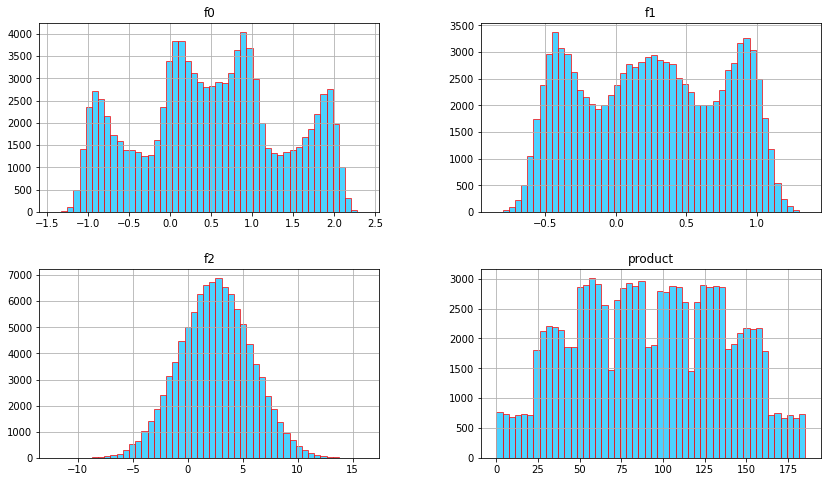

In [21]:
data_0.hist(figsize=(14, 8), bins=50, alpha=0.7, color='deepskyblue', ec='red')
plt.show()

#### Регион `geo_data_1`
<a name="332"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Выведем числовое описание данных в датасете `data_1`, применив метод `.describe()`.

In [22]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Визуализируем распределения переменных при помощи гистограмм для региона `geo_data_1`.

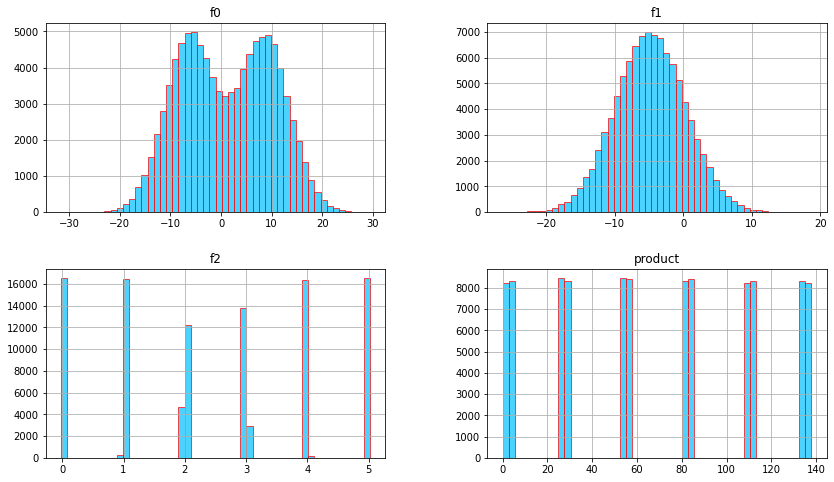

In [23]:
data_1.hist(figsize=(14, 8), bins=50, alpha=0.7, color='deepskyblue', ec='red')
plt.show()

#### Регион `geo_data_2`
<a name="333"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Выведем числовое описание данных в датасете `data_2`, применив метод `.describe()`.

In [24]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Визуализируем распределения переменных при помощи гистограмм для региона `geo_data_2`.

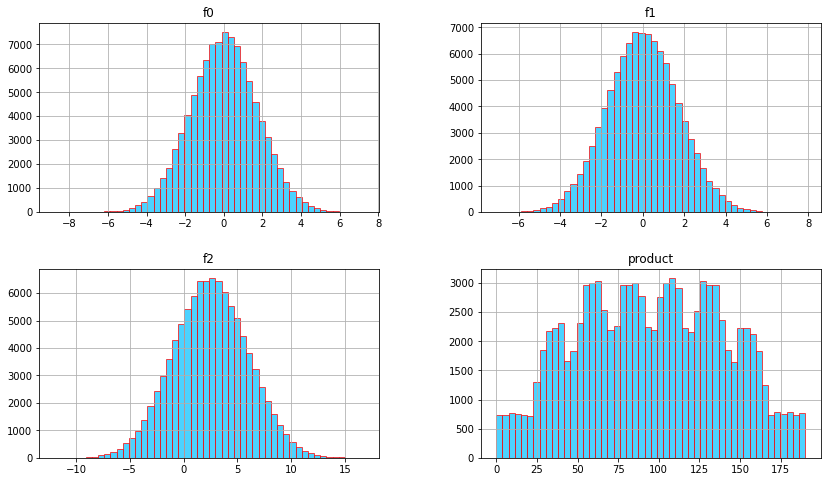

In [25]:
data_2.hist(figsize=(14, 8), bins=50, alpha=0.7, color='deepskyblue', ec='red')
plt.show()

Глядя на числовое описание данных трёх датасетов мы видим, что средние и медианы не сильно отличаются между собой, кроме признака `product` в датасете `data_1`. Но присутствует сильный разброс значений - стандартное отклонение ***std***: для данных из признаков `f0`, `f1` и `f2` стандартное отклонение даже превышает среднее значение.

С другой стороны, гистограммы показывают нам, что распределения переменных сильно отличаются друг от друга для разных регионов. Особенно сильно выделяются аномалии в данных признаков `f2` и `product` в датасете `data_1`, которые будут мешать процессу обучения.

#### Вывод по п. 3.3
<a name="334"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [**Изучение распределения переменных**](#Изучение-распределения-переменных) исследованы данные трёх регионов: `geo_data_0`, `geo_data_1` и `geo_data_2`.


В результате выполнения задач этого подраздела было выявлено следующее:
1. Во всех трёх датасетах средние и медианы не сильно отличаются между собой (кроме признака `product` в датасете `data_1`), но существует сильный разброс значений - стандартное отклонение ***std***: для данных из признаков `f0`, `f1` и `f2` стандартное отклонение даже превышает среднее значение.
2. Гистограммы показывают, что распределения переменных сильно отличаются друг от друга для разных регионов. Особенно сильно выделяются аномалии в данных признаков `f2` и `product` в датасете `data_1`, которые будут мешать процессу обучения.

### Корреляционный анализ
<a name="34"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Проведём корреляционный анализ и посмотрим, как переменные взаимосвязаны между собой - рассчитаем коэффициенты корреляции Пирсона для трёх наших датасетов `data_0`, `data_1` и `data_2`.

In [26]:
for region in range(len(all_data)):
    print(f'Для региона geo_data_{region}:')
    display(all_data[region].corr())

Для региона geo_data_0:


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


Для региона geo_data_1:


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


Для региона geo_data_2:


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Сильная линейная зависимость присутствует между данными признаков `f2` и `product` в датасете `data_1` (коэффициенты корреляции Пирсона = 0.999397), что подтверждает полученные ранее на гистограммах аномалии в данных признаков `f2` и `product` в датасете `data_1`, которые будут мешать процессу обучения. Это ухудшает качество предсказаний моделью линейной регрессии. Для остальных датасетов эта зависимость выражена слабее.

### Вывод
<a name="35"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Подготовка данных**](#Подготовка-данных) были выполнены следующие задачи:
1. исследованы данные трёх регионов `geo_data_0`, `geo_data_1` и `geo_data_2`;
2. удалены лишние признаки в датасетах;
3. изучено распределение переменных;
4. проведён корреляционный анализ.

В результате выполнения задач этого раздела было выявлено следующее:
- Исходя из числового описания данных трёх датасетов видно, что средние и медианы не сильно отличаются между собой (кроме признака `product` в датасете `data_1`), но присутствует сильный разброс значений - стандартное отклонение ***std***: для данных из признаков `f0`, `f1` и `f2` стандартное отклонение даже превышает среднее значение.
- Гистограммы показывают, что распределения переменных сильно отличаются друг от друга для разных регионов. Особенно сильно выделяются аномалии в данных признаков `f2` и `product` в датасете `data_1`, которые будут мешать процессу обучения.
- Сильная линейная зависимость присутствует между данными признаков `f2` и `product` в датасете `data_1` (коэффициенты корреляции Пирсона = 0.999397), что подтверждает полученные ранее на гистограммах аномалии в данных признаков `f2` и `product` в датасете `data_1`, которые будут мешать процессу обучения. Это ухудшает качество предсказаний моделью линейной регрессии. Для остальных датасетов эта зависимость выражена слабее.

**В проекте решается задача регрессии.**

Таким образом, данные подготовлены для обучения моделей.

## Обучение и проверка модели
<a name="4"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

### `LinearRegression`
<a name="41"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Обучим и проверим модель **линейной регрессии *Linear Regression*** для каждого из трёх регионов `geo_data_0`, `geo_data_1` и `geo_data_2`.

Создадим цикл для списка `all_data` с данными по всем трём регионам. В данном цикле выполним следующие задачи:
1. Разобьём данные на обучающую и валидационную выборки в соотношении 75:25.
2. Обучим модель и сделаем предсказания на валидационной выборке.
3. Сохраним предсказания и правильные ответы на валидационной выборке.
4. Напечатаем на экране средний запас предсказанного сырья и *RMSE* модели.

In [27]:
%%time

state = np.random.RandomState(RANDOM_STATE)

# список правильных ответов по объёму сырья в скважине 
# на валидационной выборке (тыс. баррелей)
samples_target = []

# список предсказаний по объёму сырья в скважине 
# на валидационной выборке (тыс. баррелей)
samples_predictions = [] 

# список суммы правильных ответов по объёму сырья, 
# на валидационной выборке (тыс. баррелей)
samples_target_sum = []

# список среднего запаса предсказанного сырья (тыс. баррелей)
samples_mean_product = []

# список RMSE модели (тыс. баррелей)
samples_model_rmse = []

# создадим цикл для списка all_data с данными по всем трём регионам,
# здесь len(all_data) = 3 (количество регионов)
for region in range(len(all_data)):
    data = all_data[region]
    # выделим из всех трёх датасетов по отдельности целевые признаки
    # target (признак 'product') и оставшиеся признаки features
    features = data.drop('product', axis=1)
    target = data['product']
    
    # разобьём данные на обучающую и валидационную выборки 
    # в соотношении 75:25
    features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, test_size=TEST_SIZE, random_state=state)
    
    # обучим модель и сделаем предсказания на валидационной выборке
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    # просуммируем правильные ответы по объёму сырья  
    # на валидационной выборке (тыс. баррелей)
    samples_target_sum.append(f'{target_valid.sum():.0f}')
    
    # сбросим индекс таргета на валидационной выборке
    # и добавим в список правильных ответов    
    samples_target.append(target_valid.reset_index(drop=True))
    
    # преобразуем исходный список с предсказаниями в проиндексированный
    samples_predictions.append(pd.Series(predictions))
    
    # рассчитаем средний запас предсказанного сырья
    mean_product = predictions.mean()
    samples_mean_product.append(f'{mean_product:.2f}')
    
    # рассчитаем RMSE модели
    model_rmse = mean_squared_error(target_valid, predictions)**0.5
    samples_model_rmse.append(f'{model_rmse:.2f}')
    
    
print('Сумма правильных ответов по объёму сырья на валидационной выборке ')
print('для трёх регионов geo_data_0, geo_data_1 и geo_data_2 (тыс. баррелей): ')
display(samples_target_sum)
print('')
print('Средний запас предсказанного сырья на валидационной выборке ')
print('для трёх регионов geo_data_0, geo_data_1 и geo_data_2 (тыс. баррелей): ')
display(samples_mean_product)
print('')
print('RMSE модели линейной регрессии LinearRegression на валидационной выборке ')
print('для трёх регионов geo_data_0, geo_data_1 и geo_data_2 (тыс. баррелей): ')
display(samples_model_rmse)
print('')

Сумма правильных ответов по объёму сырья на валидационной выборке 
для трёх регионов geo_data_0, geo_data_1 и geo_data_2 (тыс. баррелей): 


['2301965', '1719291', '2368724']


Средний запас предсказанного сырья на валидационной выборке 
для трёх регионов geo_data_0, geo_data_1 и geo_data_2 (тыс. баррелей): 


['92.59', '68.77', '95.09']


RMSE модели линейной регрессии LinearRegression на валидационной выборке 
для трёх регионов geo_data_0, geo_data_1 и geo_data_2 (тыс. баррелей): 


['37.58', '0.89', '39.96']


CPU times: user 249 ms, sys: 287 ms, total: 536 ms
Wall time: 505 ms


### Вывод
<a name="42"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Обучение и проверка модели**](#Обучение-и-проверка-модели) был написан цикл с применением модели линейной регрессии `LinearRegression` для каждого из трёх регионов `geo_data_0`, `geo_data_1` и `geo_data_2`.


В результате выполнения задач этого раздела были получены следующие результаты на валидационной выборке для трёх регионов `geo_data_0`, `geo_data_1` и `geo_data_2`:

1. Получены суммы правильных ответов по объёму сырья (тыс. баррелей):

    - `target_valid.sum()` = *2301965* для данных региона `geo_data_0`;
    - `target_valid.sum()` = *1719291* для данных региона `geo_data_1`;
    - `target_valid.sum()` = *2368724* для данных региона `geo_data_2`.


2. Получены значения среднего запаса предсказанного сырья `mean_product` (тыс. баррелей): 

    - `mean_product` = *92.59* для данных региона `geo_data_0`;
    - `mean_product` = *68.77* для данных региона `geo_data_1`;
    - `mean_product` = *95.09* для данных региона `geo_data_2`.


3. Получены значения *RMSE* модели линейной регрессии `LinearRegression` (тыс. баррелей):

    - *RMSE = 37.6* для данных региона `geo_data_0`;
    - *RMSE = 0.89* для данных региона `geo_data_1`;
    - *RMSE = 39.96* для данных региона `geo_data_2`.
    
    
4. Значения *RMSE* для регионов `geo_data_0` и `geo_data_2` велики относительно среднего запаса предсказанного сырья. Это говорит о сильном разбросе значений в таргетах этих датасетов.

## Подготовка к расчёту прибыли
<a name="5"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

### Расчёт безубыточности
<a name="51"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Давайте рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

Напоминаем **условия задачи**:

- При разведке региона нужно исследовать 500 точек, из которых с помощью машинного обучения нужно выбрать 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них нужно выбрать регион с наибольшей средней прибылью.


Также напоминаем **целевой признак:**
- `product` — объём запасов в скважине (тыс. баррелей)

Поясним значения переменных:
- `COST = 10_000_000` - бюджет (расходы) на разработку заданного количества лучших скважин в каждом регионе (тыс. рублей);
- `COUNT = 200` - количество лучших скважин, которые нужно выбрать для разработки в каждом регионе с помощью машинного обучения;
- `REVENUE_PER_UNIT = 450` - доход с каждой единицы продукта (рублей за 1 баррель);
- `SAMPLE_SIZE = 500` - количество скважин, которое нужно исследовать при разведке каждого региона.


*COST / COUNT* - бюджет, заложенный на одну скважину (тыс. рублей).

Рассчитаем достаточный объём сырья для одной скважины, при котором доходы равны расходам (тыс. баррелей).

In [28]:
product_balance = (f'{COST / (COUNT * REVENUE_PER_UNIT):.2f}')
product_balance

'111.11'

Сравним полученный объём сырья со средним запасом в каждом регионе (тыс. баррелей).

In [29]:
display(samples_mean_product)

['92.59', '68.77', '95.09']

### Вывод
<a name="52"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Подготовка к расчёту прибыли**](#Подготовка-к-расчёту-прибыли) были выполнены следующие задачи:
1. Рассчитан достаточный объём сырья для безубыточной разработки новой скважины. 
2. Выполнено сравнение полученного объёма сырья со средним запасом в каждом регионе.


В результате выполнения задач этого раздела было выявлено следующее:
- Во всех регионах средний запас предсказанного сырья (тыс. баррелей)
    - `mean_product` = *92.59* для данных региона `geo_data_0`,
    - `mean_product` = *68.77* для данных региона `geo_data_1`,
    - `mean_product` = *95.09* для данных региона `geo_data_2`
    
  ниже объёма сырья для безубыточной разработки новой скважины (тыс. баррелей)
    - `product_balance` = *111.11*.
    
  Т.е. концентрация продукта слишком низкая, чтобы выбирать точки случайно. Поэтому заданные 200 лучших скважин необходимо выбрать с помощью машинного обучения.

## Расчёт прибыли и рисков
<a name="6"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

### Функция для расчёта прибыли
<a name="61"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Создадим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

Напишем функцию `profit()`, которая производит подсчёт и возвращает прибыль `revenue - COST`, где `revenue` - это выручка от полученного объёма сырья. 

Функция `profit()` получает на вход:
- список правильных ответов `target` - объём запасов в скважине `product` (тыс. баррелей);
- список предсказаний `predictions` - с помощью сортировки модель выводит максимальные значения предсказаний (тыс. баррелей);
- `COUNT` - количество лучших скважин, которые нужно выбрать для разработки в каждом регионе с помощью машинного обучения.

Функция должна выбрать 200 скважин с наибольшим объёмом запасов и на основе ответов подсчитать прибыль `revenue - COST`.

В функции `profit()` выполним следующие задачи:
1. Выберем скважины с максимальными значениями предсказаний.
2. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
3. Рассчитаем прибыль для полученного объёма сырья.

In [30]:
def profit(target, predictions, COUNT):
    # выбираем скважины с максимальными значениями предсказаний
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:COUNT]
    
    # просуммируем целевое значение объёма сырья, 
    # соответствующее этим предсказаниям
    product = selected_points.sum()
    
    # рассчитаем выручку от полученного объёма сырья
    revenue = product * REVENUE_PER_UNIT
    
    # рассчитаем прибыль для полученного объёма сырья
    return revenue - COST

### Расчёт прибыли и рисков для каждого региона
<a name="62"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Создадим цикл, в котором выполним следующие задачи:
1. Применим технику *Bootstrap* с 1000 выборок (`BOOTSTRAP_SIZE = 1000`), чтобы найти распределение прибыли.
2. Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков для каждого региона. Убыток — это отрицательная прибыль.

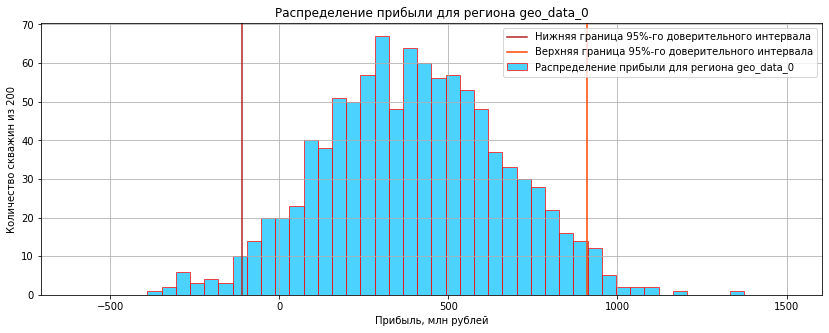

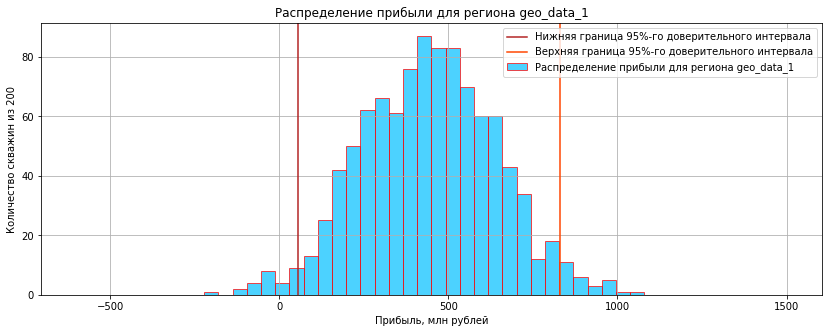

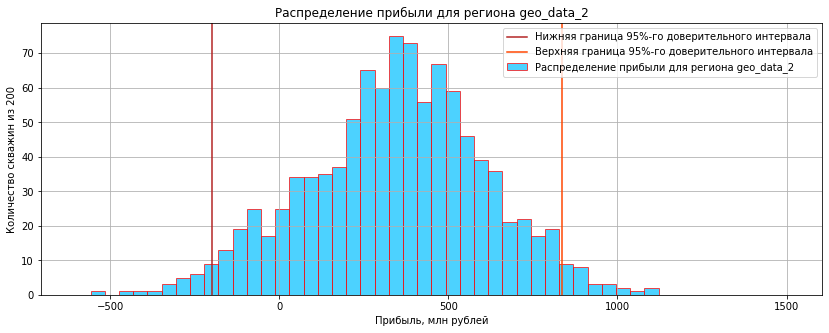

Средняя прибыль, 95%-й доверительный интервал и риск убытков от 200 лучших скважин:


,Регион,Средняя прибыль от 200 лучших скважин (млн рублей),95%-й доверительный интервал от 200 лучших скважин (млн рублей),Риск убытков от 200 лучших скважин (%)
0,geo_data_0:,396,"(-111, 910)",6.9
1,geo_data_1:,443,"(56, 831)",1.6
2,geo_data_2:,345,"(-198, 836)",10.8


In [31]:
# создадим пустой датафрейм table, 
# чтобы потом добавлять в него в цикле по одной строке row
table = pd.DataFrame(columns=['Регион',
             'Средняя прибыль от 200 лучших скважин (млн рублей)', 
             '95%-й доверительный интервал от 200 лучших скважин (млн рублей)', 
             'Риск убытков от 200 лучших скважин (%)'])


state = np.random.RandomState(RANDOM_STATE)

# создадим цикл, в котором мы найдём среднюю прибыль, 
# 95%-й доверительный интервал и риск убытков для каждого региона
for region in range(len(all_data)):
    # выбираем элемент region по порядку из списка правильных ответов 
    # на валидационной выборке
    target = samples_target[region]
    # выбираем элемент region из списка предсказаний 
    # на валидационной выборке
    predictions = samples_predictions[region]
    
    # список с прибылью от 200 лучших скважин для разработки 
    # в каждом регионе (тыс. рублей)
    profit_values = []
    
    # применим технику Bootstrap с 1000 выборок, 
    # чтобы найти распределение прибыли
    for i in range(BOOTSTRAP_SIZE):
        # выбираем 500 скважин из таргета
        target_sample = target.sample(
            SAMPLE_SIZE, replace=True, random_state=state)
        # выбираем соответствующие этим 500 скважинам предсказания
        predictions_sample = predictions[target_sample.index]
        # сбросим индекс для таргета
        target_sample = target_sample.reset_index(drop = True)
        # сбросим индекс для предсказаний
        predictions_sample = predictions_sample.reset_index(drop = True)
        # список с прибылью от 200 лучших скважин (тыс. рублей)
        profit_values.append(profit(
            target_sample, predictions_sample, COUNT))

    # преобразуем список с прибылью от 200 лучших скважин 
    # в объект Series (тыс. рублей)    
    profit_values = pd.Series(profit_values)
    
    # средняя прибыль от 200 лучших скважин 
    # для каждого региона (млн рублей)
    mean_profit = round(profit_values.mean()/1000)

    # 95%-й доверительный интервал от 200 лучших скважин 
    # для каждого региона (млн рублей)
    confidence_interval = (f'{profit_values.quantile(0.025)/1000:.0f}', 
                           f'{profit_values.quantile(0.975)/1000:.0f}') 

    # риск убытков от 200 лучших скважин для каждого региона (%)
    negative_profit_chance = (profit_values < 0).mean()*100

    # выведем все искомые параметры в виде таблицы table:
    row = [f'geo_data_{region}:', mean_profit, 
           confidence_interval, negative_profit_chance]
    table.loc[len(table)] = row
   
    # построим гистограммы распределения прибыли для трёх регионов
    (profit_values/1000).hist(figsize=(14, 5), bins=50, alpha=0.7, 
                       range = (-0.6*10**3, 1.5*10**3), color='deepskyblue', ec='red')
    plt.grid(True)
    plt.axvline(profit_values.quantile(0.025)/1000, color='firebrick')
    plt.axvline(profit_values.quantile(0.975)/1000, color='orangered')
    plt.legend(['Нижняя граница 95%-го доверительного интервала', 
                'Верхняя граница 95%-го доверительного интервала', 
                f'Распределение прибыли для региона geo_data_{region}'])
    plt.xlabel('Прибыль, млн рублей')
    plt.ylabel('Количество скважин из 200')
    plt.title(f'Распределение прибыли для региона geo_data_{region}')
    plt.show()

    
print('\033[1m' + 'Средняя прибыль, 95%-й доверительный интервал \
и риск убытков от 200 лучших скважин:' + '\033[0m')
display(table)

### Вывод
<a name="63"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Расчёт прибыли и рисков**](#Расчёт-прибыли-и-рисков) были выполнены следующие задачи:
1. написана функция для расчёта прибыли по выбранным скважинам и предсказаниям модели;
2. подсчитана прибыль и риски для каждого региона.

В результате выполнения задач этого раздела было выявлено следующее:
- Риск убытков от 200 лучших скважин составляет:
    - 6.9% - для региона `geo_data_0`,
    - 1.6% - для региона `geo_data_1`,
    - 10.8% - для региона `geo_data_2`. 

Таким образом, только в регионе `geo_data_1` вероятность убытков меньше 2.5%, что является условием задачи. А значит, для разработки скважин можно предложить регион `geo_data_1`. Средняя прибыль в этом регионе состаляет 443 млн рублей, а также 95%-й доверительный интервал не содержит отрицательных значений (убыточных скважин).

## Общий вывод
<a name="7"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Мы провели исследование с целью построения модели машинного обучения, которая поможет определить регион, где добыча нефти принесёт наибольшую прибыль.

Входными данными были данные геологоразведки в трёх регионах. Характеристики для каждой скважины в регионе уже известны.

В разделе [**подготовки данных**](#Подготовка-данных) нами были исследованы данные трёх регионов - `geo_data_0`, `geo_data_1` и `geo_data_2`, удалены лишние признаки в датасетах, изучено распределение переменных и проведён корреляционный анализ. Таким образом, данные подготовлены для обучения моделей. Было определено, что в проекте решается задача регрессии. 

В разделе [**обучения и проверки модели**](#Обучение-и-проверка-модели) мы создали цикл с применением модели линейной регрессии `LinearRegression` для каждого из трёх регионов `geo_data_0`, `geo_data_1` и `geo_data_2`. В результате выполнения задач этого раздела были получены суммы правильных ответов по объёму сырья, значения среднего запаса предсказанного сырья, значения *RMSE* модели линейной регрессии.

В разделе [**подготовки к расчёту прибыли**](#Подготовка-к-расчёту-прибыли) нами был рассчитан достаточный объём сырья для безубыточной разработки новой скважины, а также выполнено сравнение полученного объёма сырья со средним запасом в каждом регионе. Было выявлено, что выбирать точки разработки случайно не имеет смысла. Поэтому заданные 200 лучших скважин необходимо выбрать с помощью машинного обучения.

В разделе [**расчёта прибыли и рисков**](#Расчёт-прибыли-и-рисков) была создана функция для расчёта прибыли по выбранным скважинам и предсказаниям модели, подсчитаны прибыль и риски для каждого региона. Было выявлено, что регион `geo_data_1` имеет наименьший риск убытков в 1.6%, что удовлетворяет условием задачи (<2.5%), имеет наибольшую среднюю прибыль в 443 млн рублей, а также 95%-й доверительный интервал не содержит отрицательных значений (убыточных скважин).


В ходе нашего исследования удалось получить следующие результаты **на валидационной выборке**:

1. Средняя прибыль от 200 лучших скважин (млн рублей):
    - `mean_profit` = 396 - для региона `geo_data_0`;
    - `mean_profit` = 443 - для региона `geo_data_1`;
    - `mean_profit` = 345 - для региона `geo_data_2`.


2. 95%-й доверительный интервал от 200 лучших скважин (млн рублей):
    - `confidence_interval` = (-111, 910) - для региона `geo_data_0`;
    - `confidence_interval` = (56, 831) - для региона `geo_data_1`;
    - `confidence_interval` = (-198, 836) - для региона `geo_data_2`.
    

3. Риск убытков от 200 лучших скважин (%):
    - `negative_profit_chance` = 6.9% - для региона `geo_data_0`;
    - `negative_profit_chance` = 1.6% - для региона `geo_data_1`;
    - `negative_profit_chance` = 10.8% - для региона `geo_data_2`.


<b>Общая рекомендация:</b>

Специалистам, которые занимаются исследованием с целью увеличения прибыли добывающей компании «ГлавРосГосНефть», можно рекомендовать регион `geo_data_1` для разработки скважин. Этот регион также позволяет получить наибольшую среднюю прибыль - 443 млн рублей. 

Результаты исследования позволят увеличить прибыль добывающей компании «ГлавРосГосНефть».

 ______________________ ______________________ ______________________
 
На этом мы заканчиваем - благодарим вас за внимание, надеемся, что наше исследование вам понравилось и поможет сделать правильные выводы, принять правильные решения.